# Thermalization

We will measure the thermalization based on the standard deviation of the magnetization (or equivalently the magnetic moment). In the initial random configuration this is a relatively small quantity. But if $J>0$, the sites tend to align in the same direction, therefore configurations with large magnetizations are more probable. This means that the standard deviation should increase. We may expect an increasing function, which converges to some fixed value.

To measure thermalization, we will do sample measurements, and take the standard deviation of these samples at each step. At different temperature and grid size the limit is also different. We are interested in the convergence time, therefore we will normalize the plots in a way that the average of the last 1/4 of iterations is 1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
from ising_common_procedures import *
from tqdm import trange

plot_colors=['tab:blue','tab:orange','tab:green','tab:red']

## Single-site algorithm

Although the main topic of this notebook is the Wolff algorithm, we still need to compare it with the single site algorithm. Therefore we need to inspect the thermalization behaviour of both algorithms.

### Dependence on temperature

Keep in mind that the critical temperature is $\tilde\beta\approx0.44$.

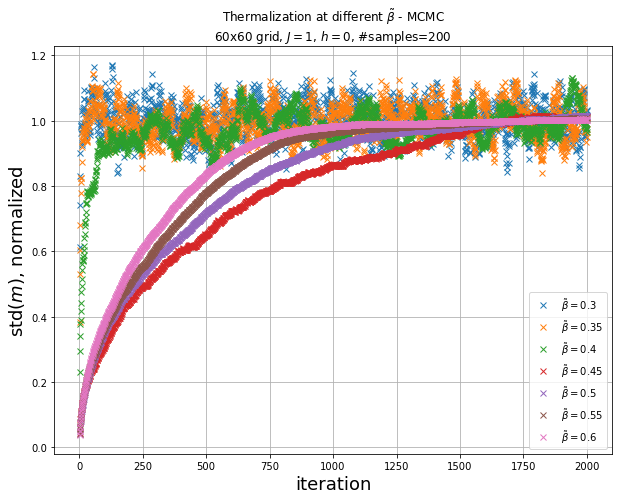

In [31]:
fig_thermalization_beta_mcmc, ax=plt.subplots(1,1, figsize=(10,7.5))
# constants
num_warmup=2000
num_meas=200
j=1
n=60
beta_values=[0.3,0.35,0.4,0.45,0.5,0.55,0.6]
# output array for magnetic moment and energy
m_result=np.zeros((num_meas,num_warmup))
e_result=np.zeros((num_meas,num_warmup))
for beta in beta_values:
    for i in trange(num_meas,desc=f'beta={beta}',leave=False):
        arr=init_grid((n,n))
        metropolis_hastings_measurement(arr, beta, j, m_result[i,:],e_result[i,:])
    m_result_raw=np.std(m_result,axis=0)
    ax.plot(range(1,num_warmup+1),m_result_raw/np.average(m_result_raw[num_warmup*3//4:]),linestyle=" ",marker='x',label=r'$\tilde\beta'+f'={beta}$')
ax.set_title(r'Thermalization at different $\tilde\beta$ - MCMC'+f'\n{n}x{n} grid, $J={j}$, $h=0$, #samples={num_meas}')
ax.set_xlabel(r'iteration',fontsize=18)
ax.set_ylabel(r'$\mathrm{std}(m)$, normalized',fontsize=18)
ax.legend()
ax.grid()

As we can see, the thermalization is the slowest around the critical temperature. Also, it is slower in the ordered phase.

In [33]:
fig_thermalization_beta_mcmc.savefig('images/thermalization-beta-dependence-mcmc.png')

### Dependence on grid size

We will check the ordered and unordered phases separately.

#### Unordered phase

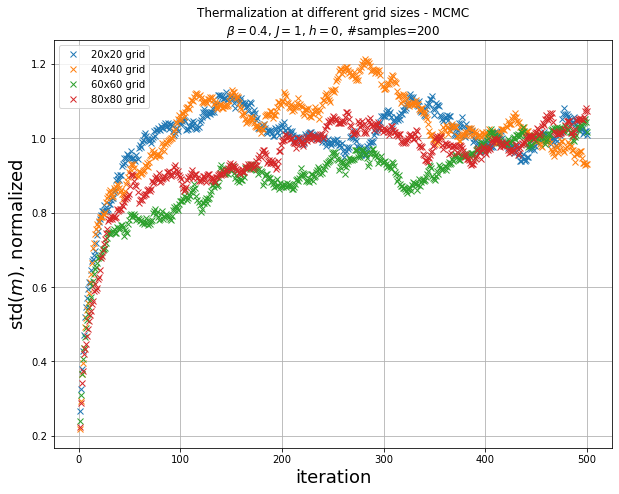

In [3]:
fig_thermalization_n_mcmc_unordered, ax=plt.subplots(1,1, figsize=(10,7.5))
# constants
num_warmup=500
num_meas=200
j=1
beta=0.4
n_values=[20,40,60,80]
# output array for magnetic moment and energy
cluster_result=np.zeros((num_meas,num_warmup))
m_result=np.zeros((num_meas,num_warmup))
e_result=np.zeros((num_meas,num_warmup))
for n in n_values:
    for i in trange(num_meas,desc=f'L={n}',leave=False):
        arr=init_grid((n,n))
        metropolis_hastings_measurement(arr, beta, j, m_result[i,:],e_result[i,:])
    m_result_raw=np.std(m_result,axis=0)
    ax.plot(range(1,num_warmup+1),m_result_raw/np.average(m_result_raw[num_warmup*3//4:]),linestyle=" ",marker='x',label=f'{n}x{n} grid')
ax.set_title(f'Thermalization at different grid sizes - MCMC\n'+r'$\beta='+f'{beta}$, $J={j}$, $h=0$, #samples={num_meas}')
ax.set_xlabel(r'iteration',fontsize=18)
ax.set_ylabel(r'$\mathrm{std}(m)$, normalized',fontsize=18)
ax.legend()
ax.grid()

In [4]:
fig_thermalization_n_mcmc_unordered.savefig('images/thermalization-L-dependence-mcmc-unordered.png')

#### Ordered phase

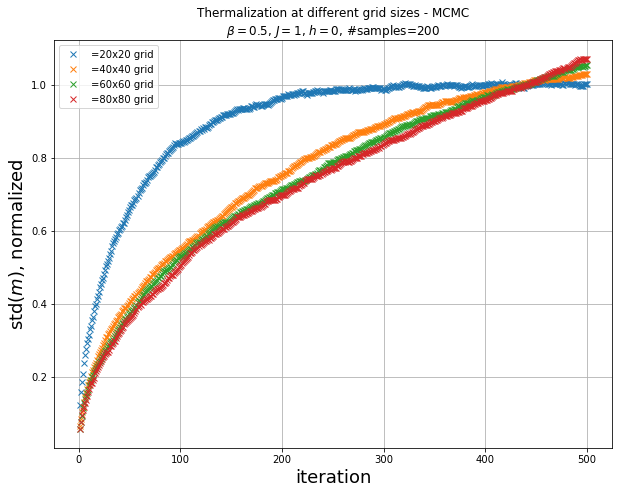

In [5]:
fig_thermalization_n_mcmc_ordered, ax=plt.subplots(1,1, figsize=(10,7.5))
# constants
num_warmup=500
num_meas=200
j=1
beta=0.5
n_values=[20,40,60,80]
# output array for magnetic moment and energy
cluster_result=np.zeros((num_meas,num_warmup))
m_result=np.zeros((num_meas,num_warmup))
e_result=np.zeros((num_meas,num_warmup))
for n in n_values:
    for i in trange(num_meas,desc=f'L={n}',leave=False):
        arr=init_grid((n,n))
        metropolis_hastings_measurement(arr, beta, j, m_result[i,:],e_result[i,:])
    m_result_raw=np.std(m_result,axis=0)
    ax.plot(range(1,num_warmup+1),m_result_raw/np.average(m_result_raw[num_warmup*3//4:]),linestyle=" ",marker='x',label=f'{n}x{n} grid')
ax.set_title(f'Thermalization at different grid sizes - MCMC\n'+r'$\beta='+f'{beta}$, $J={j}$, $h=0$, #samples={num_meas}')
ax.set_xlabel(r'iteration',fontsize=18)
ax.set_ylabel(r'$\mathrm{std}(m)$, normalized',fontsize=18)
ax.legend()
ax.grid()

In [6]:
fig_thermalization_n_mcmc_ordered.savefig('images/thermalization-L-dependence-mcmc-ordered.png')

### Summary

As we see, the thermalization time is largest when we are near the critical temperature, and when we have a large grid. Therefore we can give a lower bound for our thermalization time. We are not going to use grids larger than 120x120. Below is the graph for these parameters. Also, we can use the analytical expression for the critical coupling.

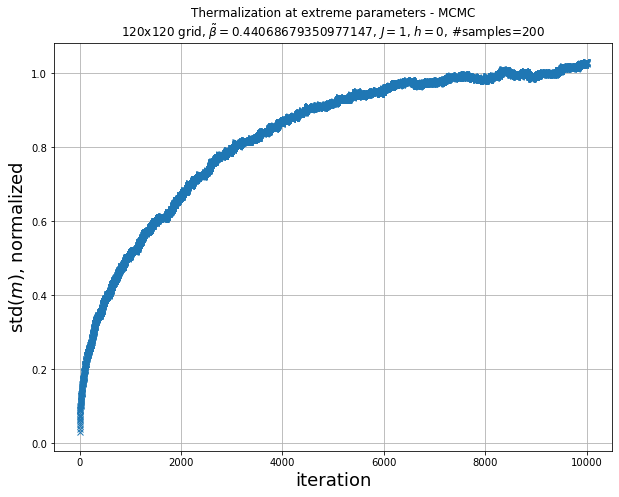

In [40]:
fig_thermalization_mcmc_extreme, ax=plt.subplots(1,1, figsize=(10,7.5))
# constants
num_warmup=10000
num_meas=200
j=1
n=120
# critical temperature
beta_c=np.log(1+np.sqrt(2))/2
# output array for magnetic moment and energy
m_result=np.zeros((num_meas,num_warmup))
e_result=np.zeros((num_meas,num_warmup))
for i in trange(num_meas,leave=False):
    arr=init_grid((n,n))
    metropolis_hastings_measurement(arr, beta_c, j, m_result[i,:],e_result[i,:])
m_result_raw=np.std(m_result,axis=0)
ax.plot(range(1,num_warmup+1),m_result_raw/np.average(m_result_raw[num_warmup*3//4:]),linestyle=" ",marker='x')
ax.set_title(f'Thermalization at extreme parameters - MCMC\n{n}x{n} grid, '+r'$\tilde\beta='+f'{beta_c}$, $J={j}$, $h=0$, #samples={num_meas}')
ax.set_xlabel(r'iteration',fontsize=18)
ax.set_ylabel(r'$\mathrm{std}(m)$, normalized',fontsize=18)
ax.grid()

In [41]:
fig_thermalization_mcmc_extreme.savefig('images/thermalization-mcmc-extreme.png')

## Wolff algorithm

### Dependence on temperature

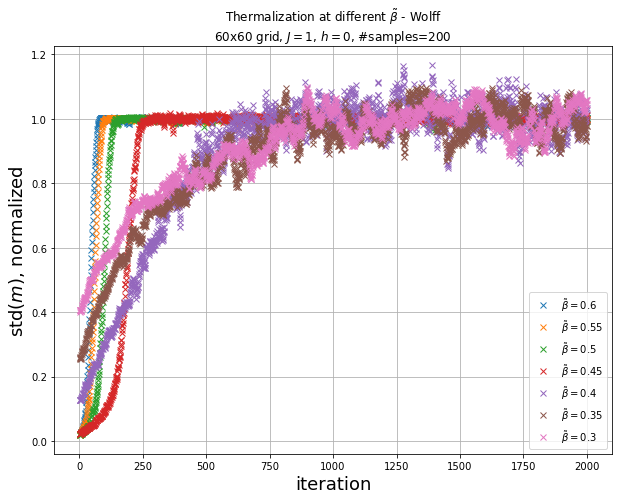

In [23]:
fig_thermalization_beta_wolff, ax=plt.subplots(1,1, figsize=(10,7.5))
# constants
num_warmup=2000
num_meas=200
j=1
n=60
beta_values=[0.6,0.55,0.5,0.45,0.4,0.35,0.3]
# output array for magnetic moment and energy
cluster_result=np.zeros((num_meas,num_warmup))
m_result=np.zeros((num_meas,num_warmup))
e_result=np.zeros((num_meas,num_warmup))
for beta in beta_values:
    for i in trange(num_meas,desc=f'beta={beta}',leave=False):
        arr=init_grid((n,n))
        wolff_measurement_full(arr, beta, j, cluster_result[i,:], m_result[i,:],e_result[i,:])
    m_result_raw=np.std(m_result,axis=0)
    ax.plot(range(1,num_warmup+1),m_result_raw/np.average(m_result_raw[num_warmup*3//4:]),linestyle=" ",marker='x',label=r'$\tilde\beta'+f'={beta}$')
ax.set_title(r'Thermalization at different $\tilde\beta$ - Wolff'+f'\n{n}x{n} grid, $J={j}$, $h=0$, #samples={num_meas}')
ax.set_xlabel(r'iteration',fontsize=18)
ax.set_ylabel(r'$\mathrm{std}(m)$, normalized',fontsize=18)
ax.legend()
ax.grid()

In [24]:
fig_thermalization_beta_wolff.savefig('images/thermalization-beta-dependence-wolff.png')

### Dependence on grid size

We will check the ordered and unordered phases separately.

#### Unordered phase

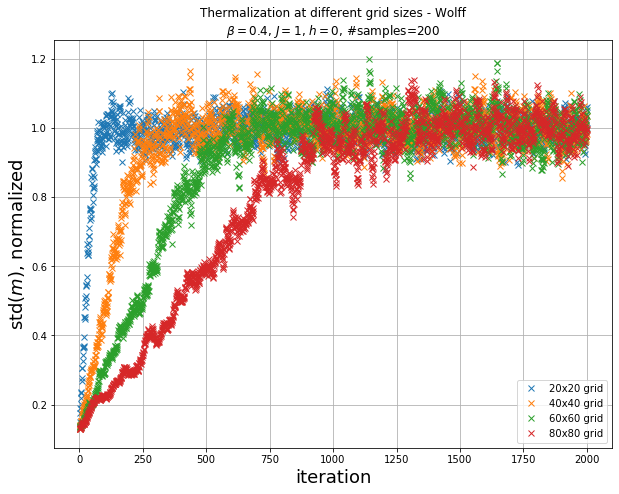

In [17]:
fig_thermalization_n_wolff_unordered, ax=plt.subplots(1,1, figsize=(10,7.5))
# constants
num_warmup=2000
num_meas=200
j=1
n=60
beta=0.4
n_values=[20,40,60,80]
# output array for magnetic moment and energy
cluster_result=np.zeros((num_meas,num_warmup))
m_result=np.zeros((num_meas,num_warmup))
e_result=np.zeros((num_meas,num_warmup))
for n in n_values:
    for i in trange(num_meas,desc=f'L={n}',leave=False):
        arr=init_grid((n,n))
        wolff_measurement_full(arr, beta, j, cluster_result[i,:], m_result[i,:],e_result[i,:])
    m_result_raw=np.std(m_result,axis=0)
    ax.plot(range(1,num_warmup+1),m_result_raw/np.average(m_result_raw[num_warmup*3//4:]),linestyle=" ",marker='x',label=f'{n}x{n} grid')
ax.set_title(f'Thermalization at different grid sizes - Wolff\n'+r'$\beta='+f'{beta}$, $J={j}$, $h=0$, #samples={num_meas}')
ax.set_xlabel(r'iteration',fontsize=18)
ax.set_ylabel(r'$\mathrm{std}(m)$, normalized',fontsize=18)
ax.legend()
ax.grid()

In [18]:
fig_thermalization_n_wolff_unordered.savefig('images/thermalization-L-dependence-wolff-unordered.png')

#### Ordered phase

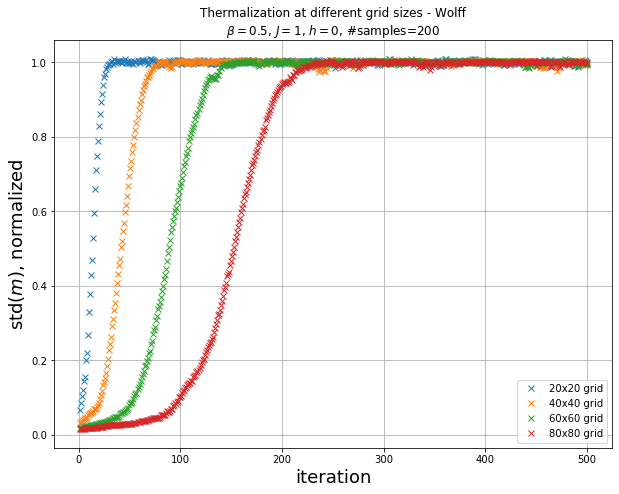

In [14]:
fig_thermalization_n_wolff_ordered, ax=plt.subplots(1,1, figsize=(10,7.5))
# constants
num_warmup=500
num_meas=200
j=1
n=60
beta=0.5
n_values=[20,40,60,80]
# output array for magnetic moment and energy
cluster_result=np.zeros((num_meas,num_warmup))
m_result=np.zeros((num_meas,num_warmup))
e_result=np.zeros((num_meas,num_warmup))
for n in n_values:
    for i in trange(num_meas,desc=f'L={n}',leave=False):
        arr=init_grid((n,n))
        wolff_measurement_full(arr, beta, j, cluster_result[i,:], m_result[i,:],e_result[i,:])
    m_result_raw=np.std(m_result,axis=0)
    ax.plot(range(1,num_warmup+1),m_result_raw/np.average(m_result_raw[num_warmup*3//4:]),linestyle=" ",marker='x',label=f'{n}x{n} grid')
ax.set_title(f'Thermalization at different grid sizes - Wolff\n'+r'$\beta='+f'{beta}$, $J={j}$, $h=0$, #samples={num_meas}')
ax.set_xlabel(r'iteration',fontsize=18)
ax.set_ylabel(r'$\mathrm{std}(m)$, normalized',fontsize=18)
ax.legend()
ax.grid()

In [15]:
fig_thermalization_n_wolff_ordered.savefig('images/thermalization-L-dependence-wolff-ordered.png')

### Summary

As we see, the thermalization time is always greater when the grid size is larger or when $\tilde\beta$ is smaller. Therefore we can give a lower bound for our thermalization time. For this we have to use our largest grid size and smallest beta value.

We are interested in the behavior near the critical temperature, therefore we can set $\tilde\beta\ge3.5$. Also, we are not going to use grids larger than 140x140. Below is the graph for these parameters.

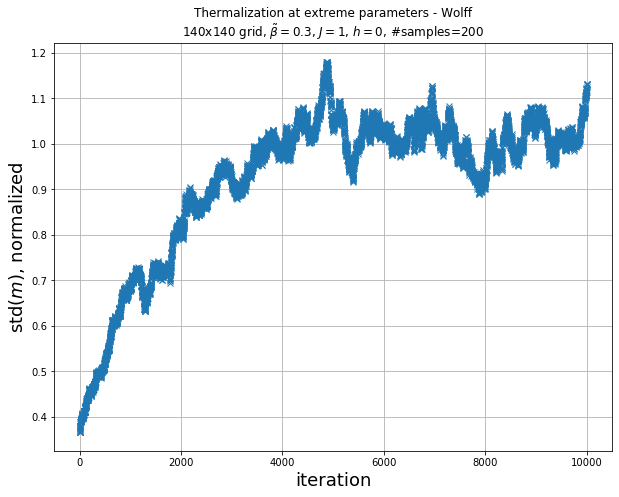

In [28]:
fig_thermalization_wolff_extreme, ax=plt.subplots(1,1, figsize=(10,7.5))
# constants
num_warmup=10000
num_meas=200
j=1
n=140
beta_values=[0.3]
# output array for magnetic moment and energy
cluster_result=np.zeros((num_meas,num_warmup))
m_result=np.zeros((num_meas,num_warmup))
e_result=np.zeros((num_meas,num_warmup))
for beta in beta_values:
    for i in trange(num_meas,desc=f'beta={beta}',leave=False):
        arr=init_grid((n,n))
        wolff_measurement_full(arr, beta, j, cluster_result[i,:], m_result[i,:],e_result[i,:])
    m_result_raw=np.std(m_result,axis=0)
    ax.plot(range(1,num_warmup+1),m_result_raw/np.average(m_result_raw[num_warmup*3//4:]),linestyle=" ",marker='x')
ax.set_title(f'Thermalization at extreme parameters - Wolff\n{n}x{n} grid, '+r'$\tilde\beta='+f'{beta}$, $J={j}$, $h=0$, #samples={num_meas}')
ax.set_xlabel(r'iteration',fontsize=18)
ax.set_ylabel(r'$\mathrm{std}(m)$, normalized',fontsize=18)
ax.grid()

In [29]:
fig_thermalization_wolff_extreme.savefig('images/thermalization-wolff-extreme.png')

So x thermalization steps are always sufficient in our parameter range (in the 2D case).